In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pycountry
from sklearn.preprocessing import LabelEncoder

In [2]:
#import data set using pandas library defined as raw_data

In [3]:
raw_data=pd.read_csv('global_student_migration.csv')

In [4]:
raw_data.head() #first 5 records

,student_id,origin_country,destination_country,destination_city,university_name,course_name,field_of_study,year_of_enrollment,scholarship_received,enrollment_reason,graduation_year,placement_status,placement_country,placement_company,starting_salary_usd,gpa_or_score,visa_status,post_graduation_visa,language_proficiency_test,test_score
0,S00001,Finland,Russia,Moscow,Lomonosov Moscow State University,Computer Science,Engineering,2021,No,Higher Ranking,2024,Placed,Russia,Microsoft,36416,3.92,Tier 4,Work Permit,TOEFL,7.8
1,S00002,UK,Germany,Aachen,RWTH Aachen,Civil Engineering,Law,2023,Yes,Job Opportunities,2024,Placed,Germany,Google,32956,2.60,Study Permit,OPT,PTE,7.9
2,S00003,Ireland,Canada,Vancouver,University of British Columbia,Law,Arts,2019,No,Scholarship,2020,Not Placed,NaN,NaN,0,2.72,F1,Blue Card,NaN,0.0
3,S00004,UAE,UK,Birmingham,University of Birmingham,Data Science,Social Sciences,2021,Yes,Quality of Life,2023,Placed,UK,Apple,50892,3.71,Schengen Student Visa,PSW,NaN,0.0
4,S00005,South Africa,Germany,Stuttgart,University of Stuttgart,Business Administration,Law,2020,Yes,Political Stability,2021,Placed,Germany,IBM,54790,2.96,Schengen Student Visa,OPT,PTE,8.2


In [5]:
raw_data.info() #information about data set records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 5000 non-null   object 
 1   origin_country             5000 non-null   object 
 2   destination_country        5000 non-null   object 
 3   destination_city           5000 non-null   object 
 4   university_name            5000 non-null   object 
 5   course_name                5000 non-null   object 
 6   field_of_study             5000 non-null   object 
 7   year_of_enrollment         5000 non-null   int64  
 8   scholarship_received       5000 non-null   object 
 9   enrollment_reason          5000 non-null   object 
 10  graduation_year            5000 non-null   int64  
 11  placement_status           5000 non-null   object 
 12  placement_country          2509 non-null   object 
 13  placement_company          2509 non-null   objec

In [6]:
raw_data.size

100000

In [7]:
raw_data.shape

(5000, 20)

In [8]:
raw_data.index

RangeIndex(start=0, stop=5000, step=1)

In [9]:
#find null values

In [10]:
raw_data.isnull().sum() 

student_id                      0
origin_country                  0
destination_country             0
destination_city                0
university_name                 0
course_name                     0
field_of_study                  0
year_of_enrollment              0
scholarship_received            0
enrollment_reason               0
graduation_year                 0
placement_status                0
placement_country            2491
placement_company            2491
starting_salary_usd             0
gpa_or_score                    0
visa_status                     0
post_graduation_visa            0
language_proficiency_test     982
test_score                      0
dtype: int64

In [11]:
#create data frame as data 

In [12]:
data = pd.DataFrame(raw_data)

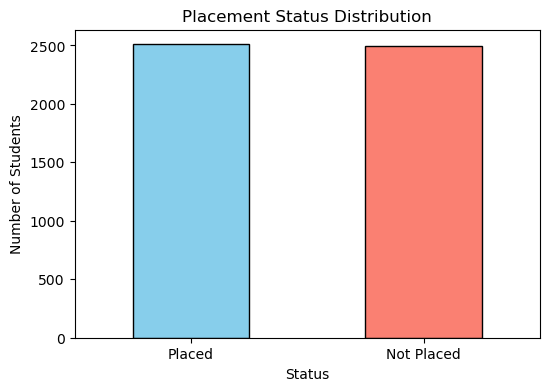

In [13]:
status_counts = data['placement_status'].value_counts()

plt.figure(figsize=(6, 4))
status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

plt.title('Placement Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Students')
plt.xticks(rotation=0) 
plt.show()

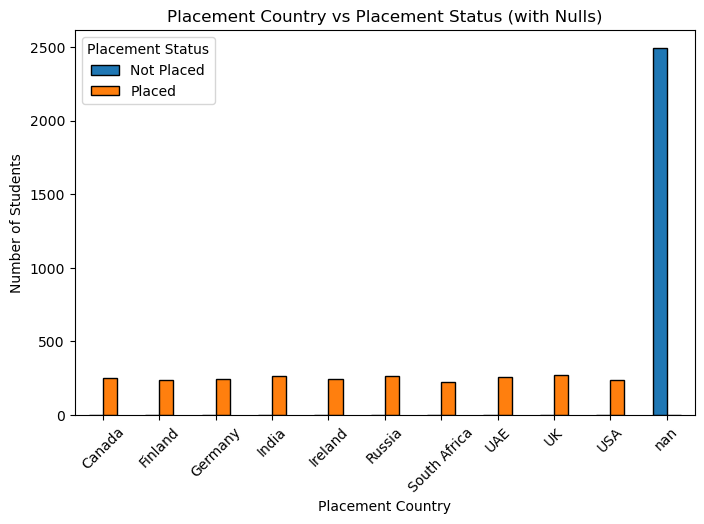

In [14]:
country_status = pd.crosstab(data['placement_country'],
                             data['placement_status'],
                             dropna=False)  


country_status.plot(kind='bar', figsize=(8,5), edgecolor='black')

plt.title('Placement Country vs Placement Status (with Nulls)')
plt.xlabel('Placement Country')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Placement Status')
plt.show()


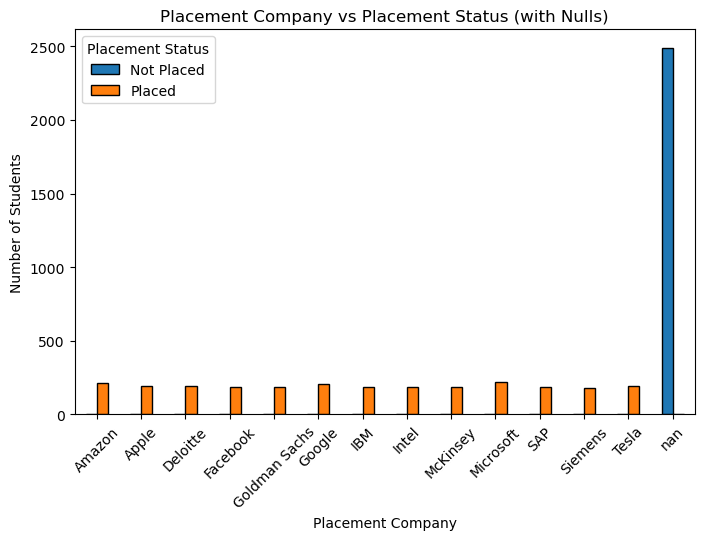

In [15]:
country_status = pd.crosstab(data['placement_company'],
                             data['placement_status'],
                             dropna=False)  # <-- keep NaN as a row

# --- Step 2: Plot grouped bar chart ---
country_status.plot(kind='bar', figsize=(8,5), edgecolor='black')

plt.title('Placement Company vs Placement Status (with Nulls)')
plt.xlabel('Placement Company')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Placement Status')
plt.show()


In [16]:
 #As placement status distribution distribution chart, data set has balanced target variable .
#As negative values in target variable columns don't have values in placement country and placement company .
# it shows from 'Placement Country vs Placement Status (with Nulls) ' chart and 'Placement Company vs Placement Status (with Nulls)' chart.
#therefore placement country feature and placement company feature have half of null values. 
#in cleaning part of preprocessing the data  set we cannot use drop option for  null values because data set may be imbalanced.
# The best option is ,fill null values as 'no placement' . 

In [17]:
data['placement_country'] = data['placement_country'].fillna('No Placement')
data['placement_company'] = data['placement_company'].fillna('No Placement')

In [18]:
data.isnull().sum()

student_id                     0
origin_country                 0
destination_country            0
destination_city               0
university_name                0
course_name                    0
field_of_study                 0
year_of_enrollment             0
scholarship_received           0
enrollment_reason              0
graduation_year                0
placement_status               0
placement_country              0
placement_company              0
starting_salary_usd            0
gpa_or_score                   0
visa_status                    0
post_graduation_visa           0
language_proficiency_test    982
test_score                     0
dtype: int64

In [19]:
data['language_proficiency_test'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: language_proficiency_test
Non-Null Count  Dtype 
--------------  ----- 
4018 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


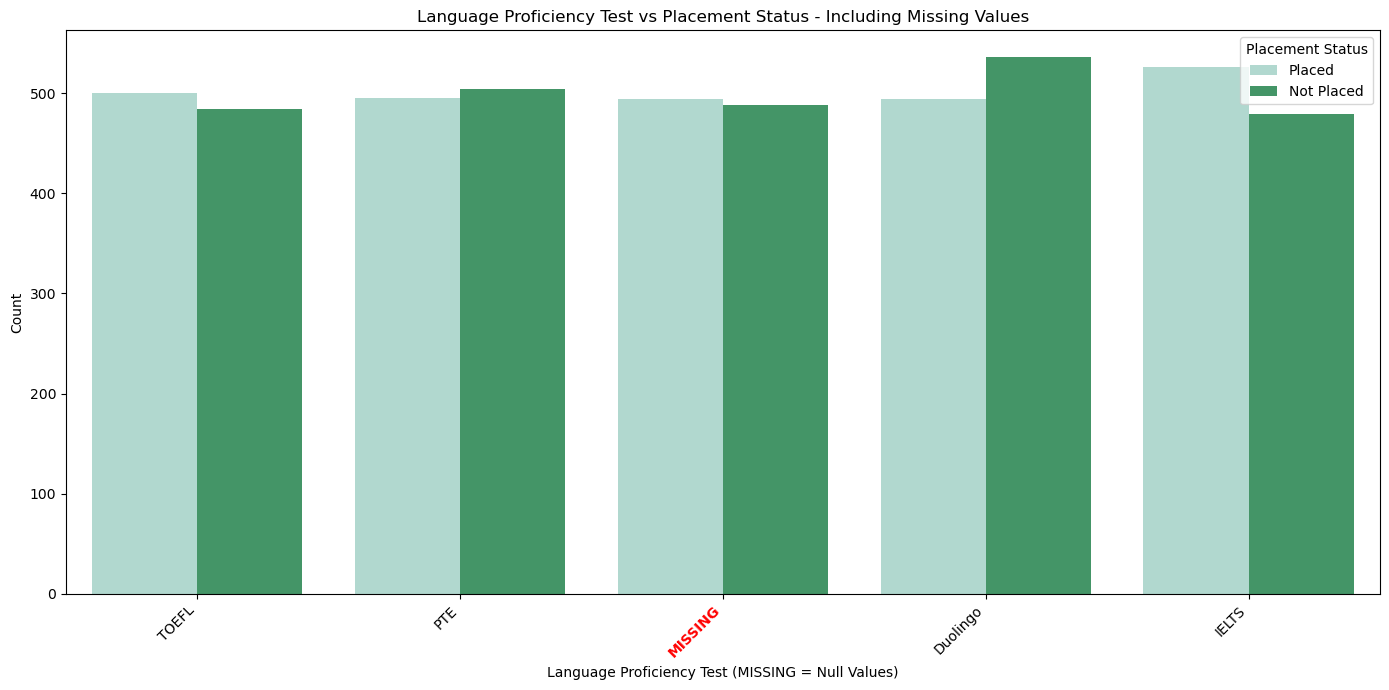

In [20]:
df_plot = data.copy()


df_plot['language_proficiency_test'] = df_plot['language_proficiency_test'].fillna('MISSING')
df_plot['placement_status'] = df_plot['placement_status'].fillna('MISSING')

plt.figure(figsize=(14, 7))


sns.countplot(data=df_plot, 
             x='language_proficiency_test', 
             hue='placement_status', 
             palette='BuGn')

plt.title("Language Proficiency Test vs Placement Status - Including Missing Values")
plt.xlabel("Language Proficiency Test (MISSING = Null Values)")
plt.ylabel("Count")
plt.legend(title="Placement Status")
plt.xticks(rotation=45, ha='right')

for i, label in enumerate(plt.gca().get_xticklabels()):
    if label.get_text() == 'MISSING':
        label.set_color('red')
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [21]:
# As this chart missing values included  approximately same records in  positive and negative values of target variable .
#So we can drop records of null values.

In [22]:
df=data.dropna(axis=0)

In [23]:
df.isnull().sum()

student_id                   0
origin_country               0
destination_country          0
destination_city             0
university_name              0
course_name                  0
field_of_study               0
year_of_enrollment           0
scholarship_received         0
enrollment_reason            0
graduation_year              0
placement_status             0
placement_country            0
placement_company            0
starting_salary_usd          0
gpa_or_score                 0
visa_status                  0
post_graduation_visa         0
language_proficiency_test    0
test_score                   0
dtype: int64

In [24]:
df.shape

(4018, 20)

Duplicate Values

In [25]:
df.duplicated().sum()

np.int64(0)

Standardize

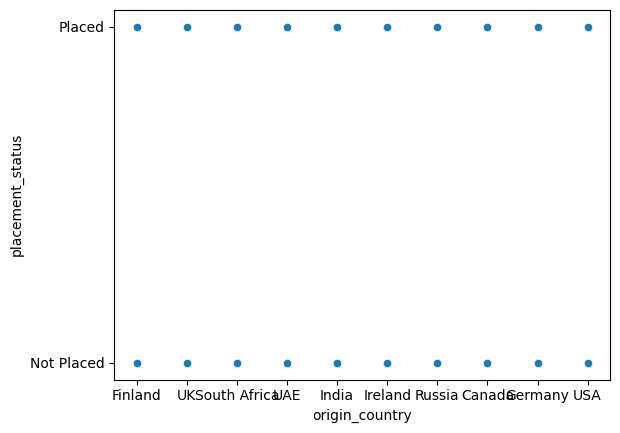

In [26]:
sns.scatterplot(data=df, x="origin_country", y="placement_status")
plt.show()

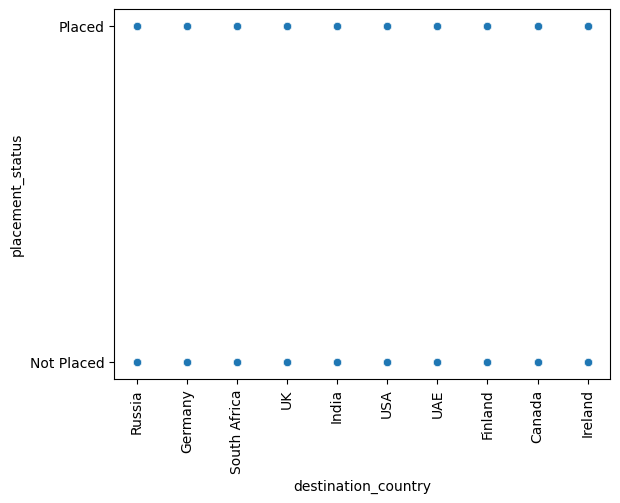

In [27]:
sns.scatterplot(data=df, x="destination_country", y="placement_status")
plt.xticks(rotation=90)
plt.show()

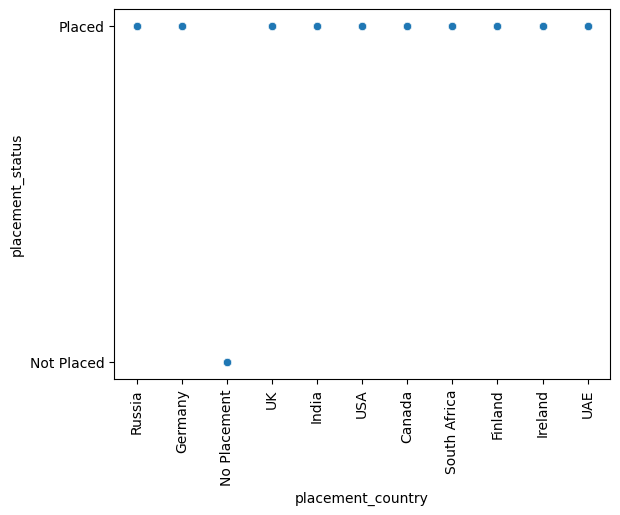

In [28]:
sns.scatterplot(data=df, x="placement_country", y="placement_status")
plt.xticks(rotation=90)
plt.show()

In [29]:
#in placement country ,desitnation country and origin country features have different forms .
# using pycountry library they are converted to uniform, structured format in Standardize .

In [30]:
custom_mappings = {
    "usa": "United States",
    "u.s.a": "United States",
    "us": "United States",
    "uk": "United Kingdom",
    "uae": "United Arab Emirates",
    "england": "United Kingdom"
}

def standardize_country(name):
    if not isinstance(name, str):
        return name
    
    name_clean = name.strip().lower()
    
   
    if name_clean in custom_mappings:
        return custom_mappings[name_clean]
    

    try:
        country = pycountry.countries.lookup(name_clean)
        return country.name
    except LookupError:
        return name.title()

In [31]:
df=df.copy()

In [32]:
df['placement_country'] = df['placement_country'].apply(standardize_country)

In [33]:
df = df.assign(placement_country=df['placement_country'].apply(standardize_country))


In [34]:
df['placement_country'].unique()

array(['Russia', 'Germany', 'No Placement', 'United Kingdom', 'India',
       'United States', 'Canada', 'South Africa', 'Finland', 'Ireland',
       'United Arab Emirates'], dtype=object)

In [35]:
df['destination_country'] = df['destination_country'].apply(standardize_country)

In [36]:
df = df.assign(destination_country=df['destination_country'].apply(standardize_country))


In [37]:
df['destination_country'].unique()

array(['Russia', 'Germany', 'South Africa', 'United Kingdom', 'India',
       'United States', 'United Arab Emirates', 'Finland', 'Canada',
       'Ireland'], dtype=object)

In [38]:
df['origin_country'] = df['origin_country'].apply(standardize_country)

In [39]:
df = df.assign(placement_country=df['placement_country'].apply(standardize_country))


In [40]:
df['origin_country'].unique()

array(['Finland', 'United Kingdom', 'South Africa',
       'United Arab Emirates', 'India', 'Ireland', 'Russia', 'Canada',
       'Germany', 'United States'], dtype=object)

Outline Removal

In [41]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
print("Numeric Columns:", list(num_cols))

Numeric Columns: ['year_of_enrollment', 'graduation_year', 'starting_salary_usd', 'gpa_or_score', 'test_score']


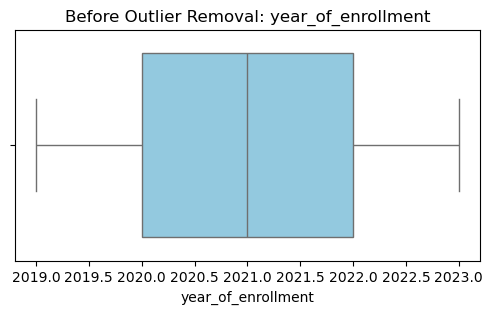

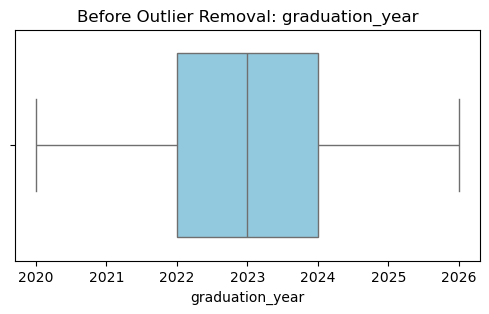

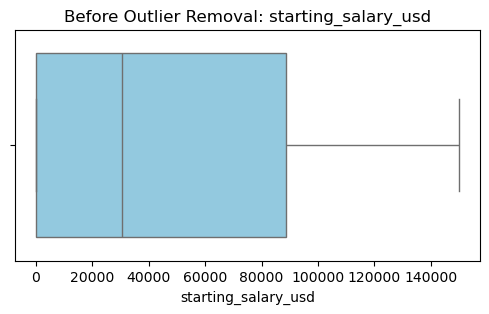

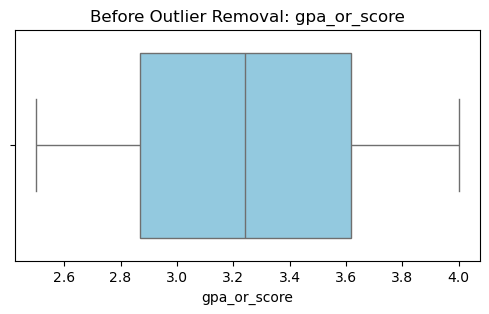

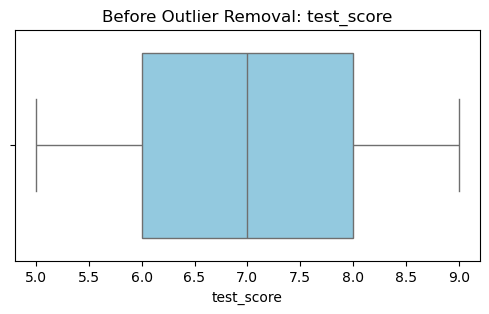

In [42]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Before Outlier Removal: {col}")
    plt.show()

In [43]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("After Outlier Removal:", df_clean.shape)

After Outlier Removal: (4018, 20)


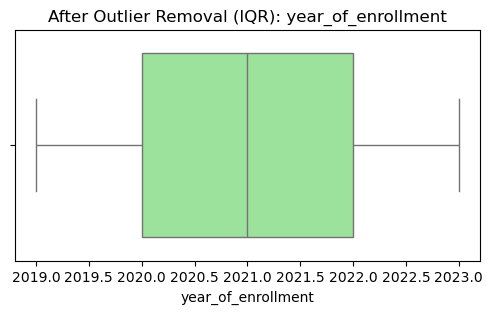

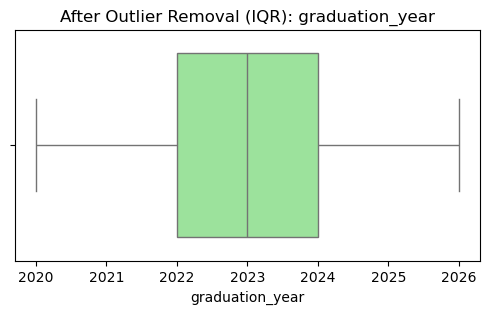

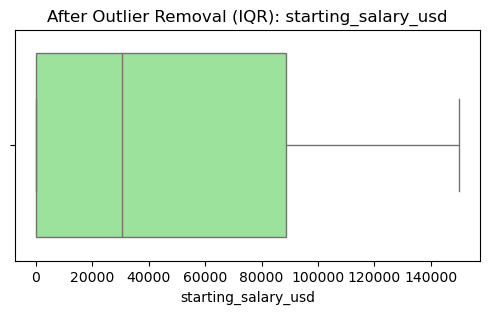

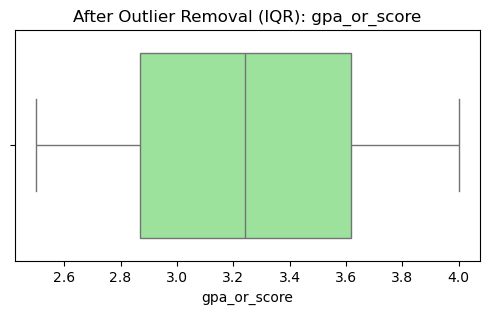

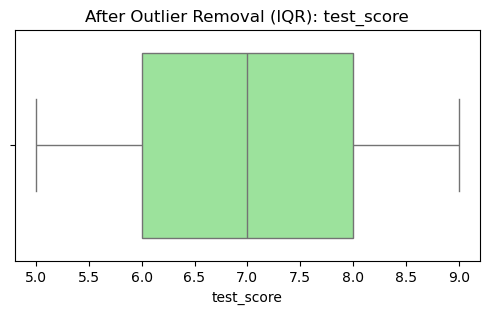

In [44]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df_clean[col], color="lightgreen")
    plt.title(f"After Outlier Removal (IQR): {col}")
    plt.show()

Encode

In [45]:
label = LabelEncoder()


In [46]:
df['placement_status'].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [47]:
df['placement_status'] = label.fit_transform(df['placement_status'])

In [48]:
df['placement_status'].unique()

array([1, 0])

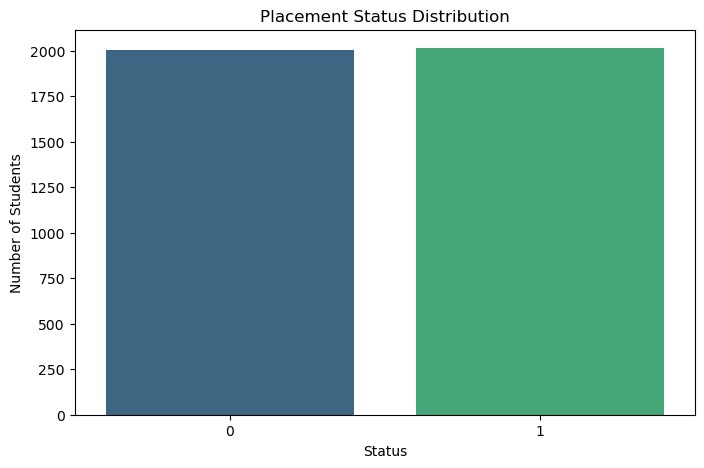

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x='placement_status', data=df,  hue='placement_status',  palette='viridis', legend=False)
plt.title("Placement Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Students")
plt.show()

In [50]:
df['scholarship_received'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
df['scholarship_received'] = label.fit_transform(df['scholarship_received'])

In [52]:
df['scholarship_received'].unique()

array([0, 1])

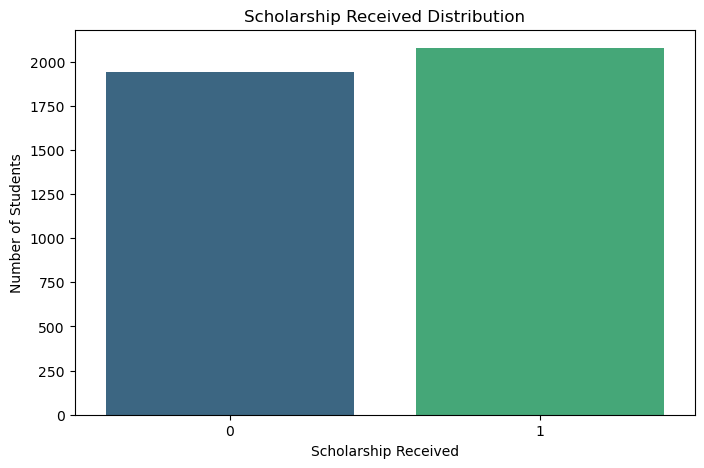

In [53]:
plt.figure(figsize=(8,5))
sns.countplot(x='scholarship_received', data=df,hue='scholarship_received', palette='viridis', legend=False  )
plt.title("Scholarship Received Distribution")
plt.xlabel("Scholarship Received")
plt.ylabel("Number of Students")
plt.show()

In [54]:
print(df.dtypes)

student_id                    object
origin_country                object
destination_country           object
destination_city              object
university_name               object
course_name                   object
field_of_study                object
year_of_enrollment             int64
scholarship_received           int64
enrollment_reason             object
graduation_year                int64
placement_status               int64
placement_country             object
placement_company             object
starting_salary_usd            int64
gpa_or_score                 float64
visa_status                   object
post_graduation_visa          object
language_proficiency_test     object
test_score                   float64
dtype: object


In [55]:
categorical_cols = ['origin_country','destination_country','destination_city','university_name','course_name','field_of_study','enrollment_reason','placement_country', 'placement_company', 'language_proficiency_test','visa_status','post_graduation_visa']
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print("One-Hot Encoding Completed")
print("Shape before encoding:", raw_data.shape)
print("Shape after encoding:", data_encoded.shape)
data_encoded.head(10)

One-Hot Encoding Completed
Shape before encoding: (5000, 20)
Shape after encoding: (4018, 209)


,student_id,year_of_enrollment,scholarship_received,graduation_year,placement_status,starting_salary_usd,gpa_or_score,test_score,origin_country_Finland,origin_country_Germany,...,language_proficiency_test_TOEFL,visa_status_J1,visa_status_Schengen Student Visa,visa_status_Student Visa,visa_status_Study Permit,visa_status_Tier 4,post_graduation_visa_OPT,post_graduation_visa_PSW,post_graduation_visa_Post-Study Visa,post_graduation_visa_Work Permit
0,S00001,2021,0,2024,1,36416,3.92,7.8,1,0,...,1,0,0,0,0,1,0,0,0,1
1,S00002,2023,1,2024,1,32956,2.60,7.9,0,0,...,0,0,0,0,1,0,1,0,0,0
4,S00005,2020,1,2021,1,54790,2.96,8.2,0,0,...,0,0,1,0,0,0,1,0,0,0
5,S00006,2022,1,2023,0,0,2.69,7.4,0,0,...,1,1,0,0,0,0,0,0,0,0
6,S00007,2019,1,2021,0,0,2.99,5.6,0,0,...,0,0,0,0,1,0,0,0,0,0
7,S00008,2023,0,2024,1,98247,3.53,5.4,0,0,...,0,0,0,1,0,0,0,0,0,1
11,S00012,2020,1,2022,1,143194,2.78,6.5,0,0,...,0,0,0,1,0,0,1,0,0,0
12,S00013,2020,0,2022,1,89534,3.47,6.7,0,0,...,1,0,0,0,0,0,0,0,1,0
13,S00014,2021,1,2024,0,0,2.91,6.5,0,0,...,1,0,0,0,1,0,1,0,0,0
14,S00015,2020,1,2021,0,0,3.00,8.1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [56]:
columns_filtered = data_encoded.filter(like='origin_country')
print(columns_filtered.head())

   origin_country_Finland  origin_country_Germany  origin_country_India  \
0                       1                       0                     0   
1                       0                       0                     0   
4                       0                       0                     0   
5                       0                       0                     0   
6                       0                       0                     0   

   origin_country_Ireland  origin_country_Russia  origin_country_South Africa  \
0                       0                      0                            0   
1                       0                      0                            0   
4                       0                      0                            1   
5                       0                      0                            0   
6                       0                      0                            0   

   origin_country_United Arab Emirates  origin_country_United 

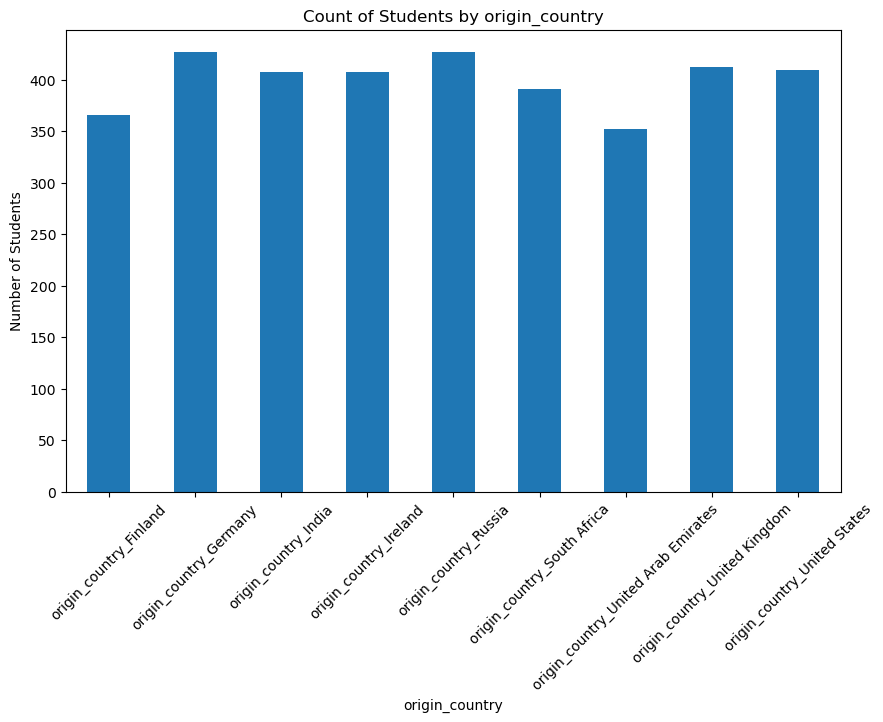

In [57]:
columns_filtered = data_encoded.filter(like='origin_country')

origin_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
origin_counts.plot(kind='bar')

plt.title("Count of Students by origin_country")
plt.xlabel("origin_country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [58]:
columns_filtered = data_encoded.filter(like='destination_country')
print(columns_filtered.head())

   destination_country_Finland  destination_country_Germany  \
0                            0                            0   
1                            0                            1   
4                            0                            1   
5                            0                            0   
6                            0                            0   

   destination_country_India  destination_country_Ireland  \
0                          0                            0   
1                          0                            0   
4                          0                            0   
5                          0                            0   
6                          0                            0   

   destination_country_Russia  destination_country_South Africa  \
0                           1                                 0   
1                           0                                 0   
4                           0                        

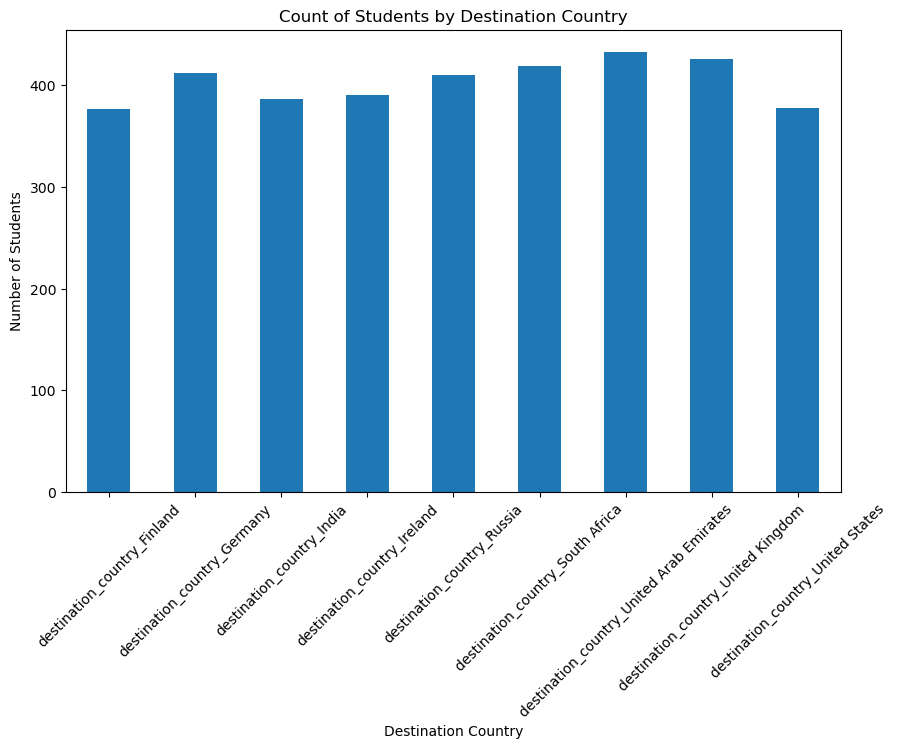

In [59]:
columns_filtered = data_encoded.filter(like='destination_country')

destination_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
destination_counts.plot(kind='bar')

plt.title("Count of Students by Destination Country")
plt.xlabel("Destination Country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [60]:
columns_filtered = data_encoded.filter(like='destination_city')
print(columns_filtered.head())

   destination_city_Abu Dhabi  destination_city_Bangalore  \
0                           0                           0   
1                           0                           0   
4                           0                           0   
5                           0                           0   
6                           0                           0   

   destination_city_Berlin  destination_city_Birmingham  \
0                        0                            0   
1                        0                            0   
4                        0                            0   
5                        0                            0   
6                        0                            0   

   destination_city_Boston  destination_city_Cambridge  \
0                        0                           0   
1                        0                           0   
4                        0                           0   
5                        0                    

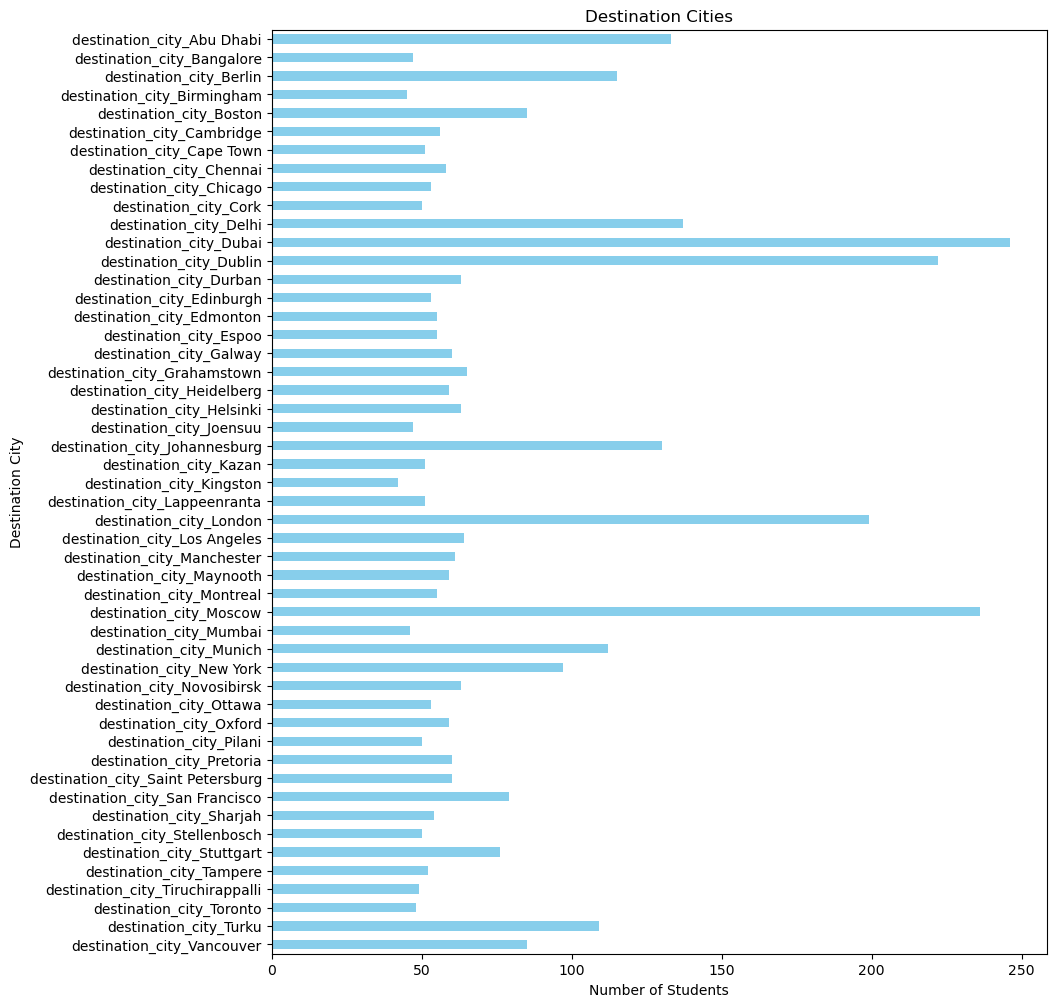

In [61]:
columns_filtered = data_encoded.filter(like='destination_city')

destination_counts = columns_filtered.sum()

plt.figure(figsize=(10,12))
destination_counts.plot(kind='barh', color='skyblue')
plt.title("Destination Cities")
plt.xlabel("Number of Students")
plt.ylabel("Destination City")
plt.gca().invert_yaxis()  # largest on top
plt.show()

In [62]:
columns_filtered = data_encoded.filter(like='university_name')
print(columns_filtered.head())

   university_name_American University of Sharjah  \
0                                               0   
1                                               0   
4                                               0   
5                                               0   
6                                               0   

   university_name_BITS Pilani  \
0                            0   
1                            0   
4                            0   
5                            0   
6                            0   

   university_name_Bauman Moscow State Technical University  \
0                                                  0          
1                                                  0          
4                                                  0          
5                                                  0          
6                                                  0          

   university_name_Columbia University  university_name_Delhi University  \
0                    

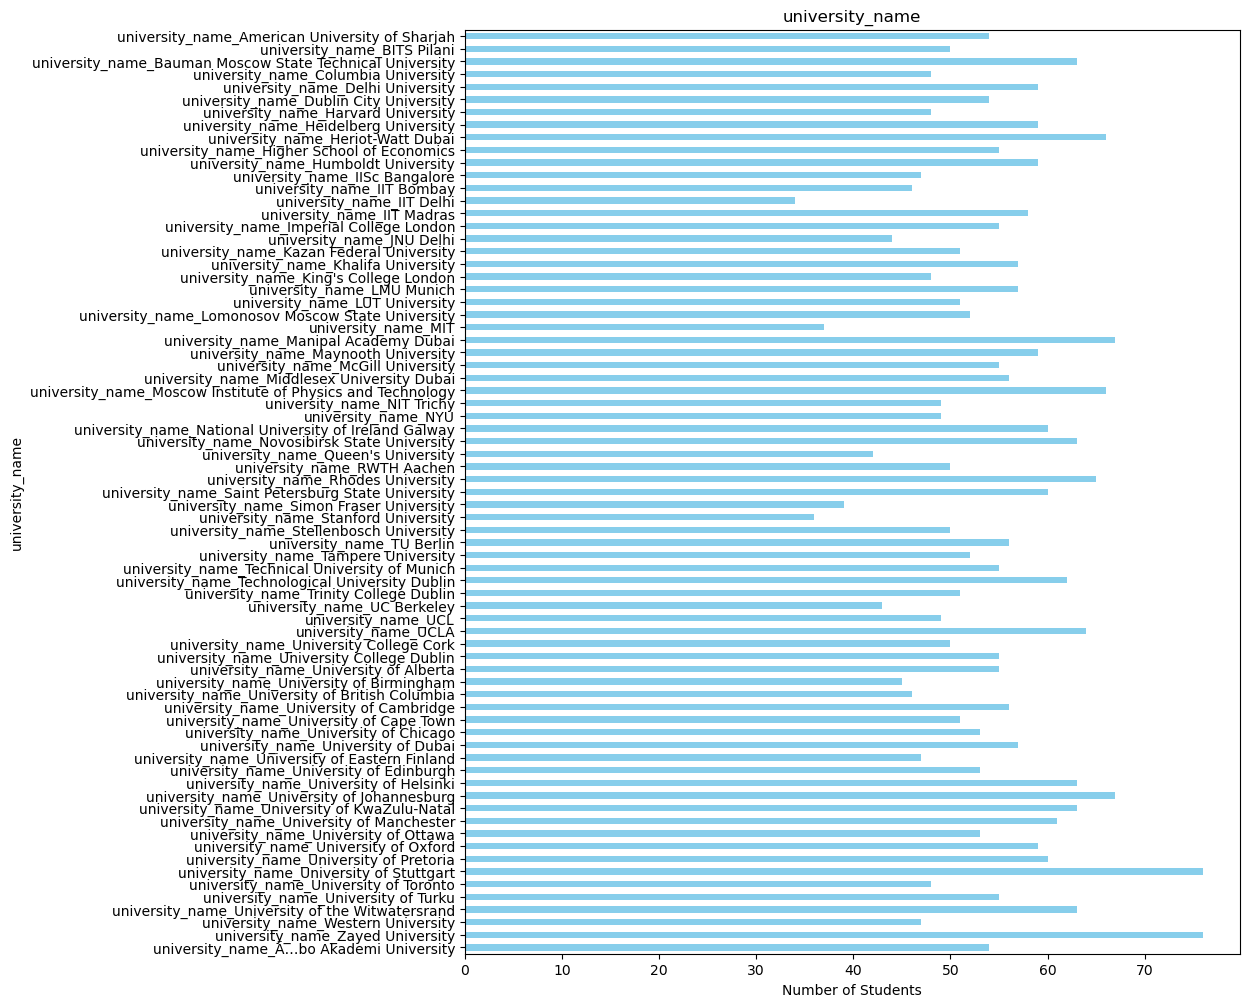

In [63]:
columns_filtered = data_encoded.filter(like='university_name')

university_name_counts = columns_filtered.sum()

plt.figure(figsize=(10,12))
university_name_counts.plot(kind='barh', color='skyblue')
plt.title("university_name")
plt.xlabel("Number of Students")
plt.ylabel("university_name")
plt.gca().invert_yaxis()  # largest on top
plt.show()

In [64]:
columns_filtered = data_encoded.filter(like='course_name')
print(columns_filtered.head())

   course_name_Biotechnology  course_name_Business Administration  \
0                          0                                    0   
1                          0                                    0   
4                          0                                    1   
5                          0                                    0   
6                          0                                    0   

   course_name_Civil Engineering  course_name_Computer Science  \
0                              0                             1   
1                              1                             0   
4                              0                             0   
5                              0                             0   
6                              0                             0   

   course_name_Data Science  course_name_Design  course_name_Economics  \
0                         0                   0                      0   
1                         0             

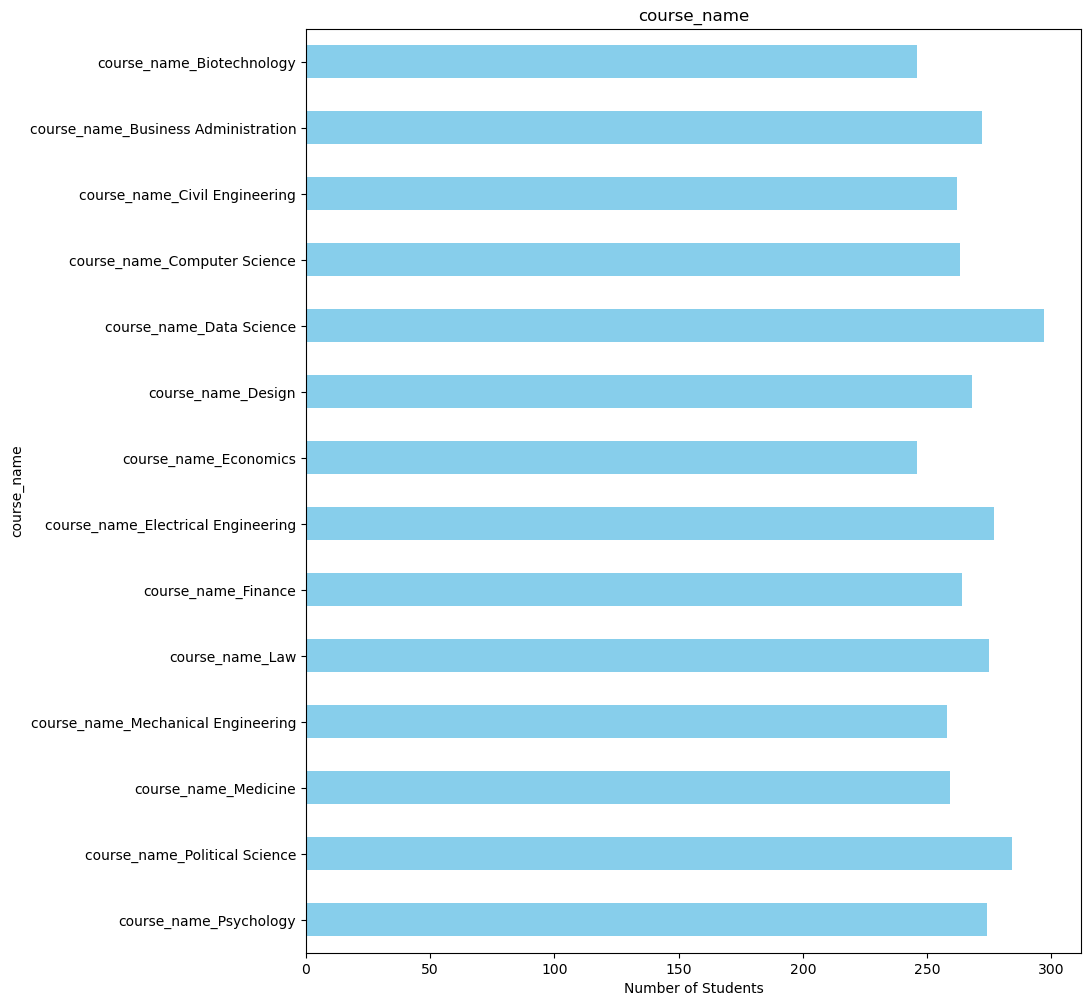

In [65]:
columns_filtered = data_encoded.filter(like='course_name')

course_name_counts = columns_filtered.sum()

plt.figure(figsize=(10,12))
course_name_counts.plot(kind='barh', color='skyblue')
plt.title("course_name")
plt.xlabel("Number of Students")
plt.ylabel("course_name")
plt.gca().invert_yaxis()  # largest on top
plt.show()

In [66]:
columns_filtered = data_encoded.filter(like='field_of_study')
print(columns_filtered.head())

   field_of_study_Business  field_of_study_Computer Science  \
0                        0                                0   
1                        0                                0   
4                        0                                0   
5                        0                                0   
6                        0                                0   

   field_of_study_Engineering  field_of_study_Law  field_of_study_Medicine  \
0                           1                   0                        0   
1                           0                   1                        0   
4                           0                   1                        0   
5                           1                   0                        0   
6                           0                   1                        0   

   field_of_study_Natural Sciences  field_of_study_Social Sciences  
0                                0                               0  
1             

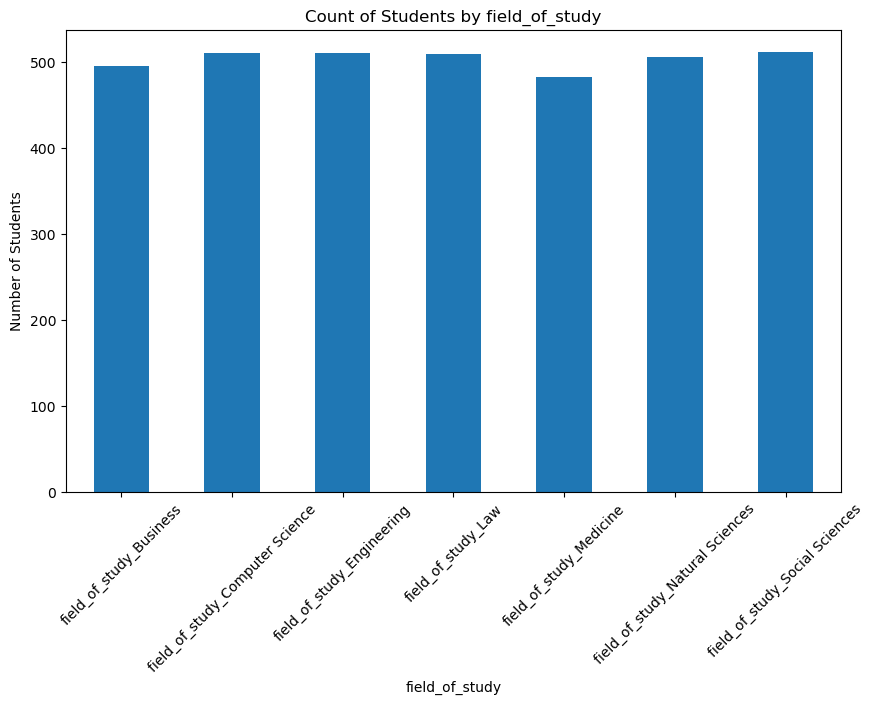

In [67]:
columns_filtered = data_encoded.filter(like='field_of_study')

field_of_study_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
field_of_study_counts.plot(kind='bar')

plt.title("Count of Students by field_of_study")
plt.xlabel("field_of_study")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [68]:
columns_filtered = data_encoded.filter(like='enrollment_reason')
print(columns_filtered.head())

   enrollment_reason_Job Opportunities  enrollment_reason_Political Stability  \
0                                    0                                      0   
1                                    1                                      0   
4                                    0                                      1   
5                                    1                                      0   
6                                    0                                      0   

   enrollment_reason_Quality of Life  enrollment_reason_Scholarship  
0                                  0                              0  
1                                  0                              0  
4                                  0                              0  
5                                  0                              0  
6                                  1                              0  


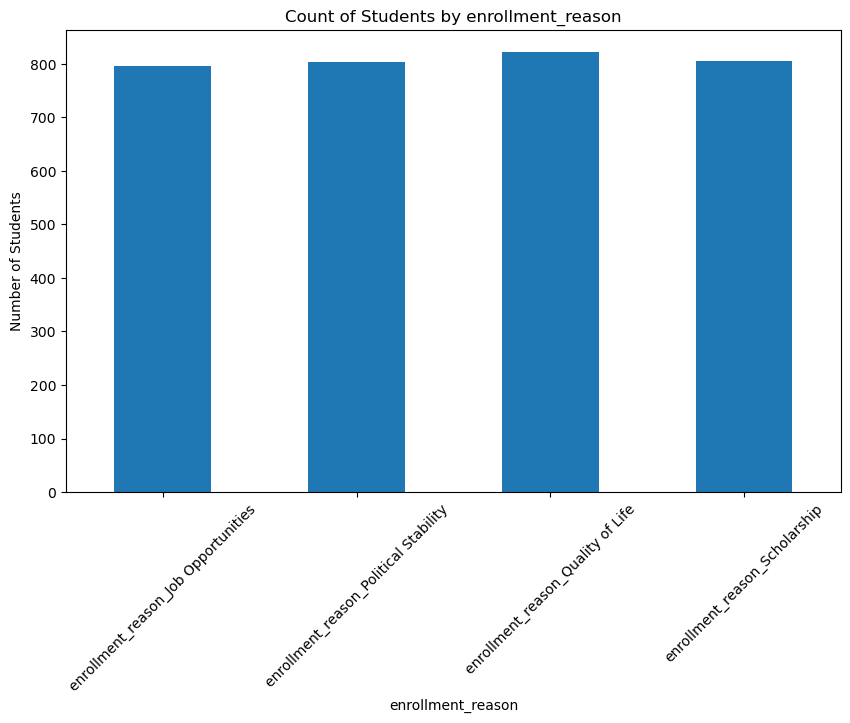

In [69]:
columns_filtered = data_encoded.filter(like='enrollment_reason')

enrollment_reason_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
enrollment_reason_counts.plot(kind='bar')

plt.title("Count of Students by enrollment_reason")
plt.xlabel("enrollment_reason")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [70]:
columns_filtered = data_encoded.filter(like='placement_country')
print(columns_filtered.head())

   placement_country_Finland  placement_country_Germany  \
0                          0                          0   
1                          0                          1   
4                          0                          1   
5                          0                          0   
6                          0                          0   

   placement_country_India  placement_country_Ireland  \
0                        0                          0   
1                        0                          0   
4                        0                          0   
5                        0                          0   
6                        0                          0   

   placement_country_No Placement  placement_country_Russia  \
0                               0                         1   
1                               0                         0   
4                               0                         0   
5                               1                 

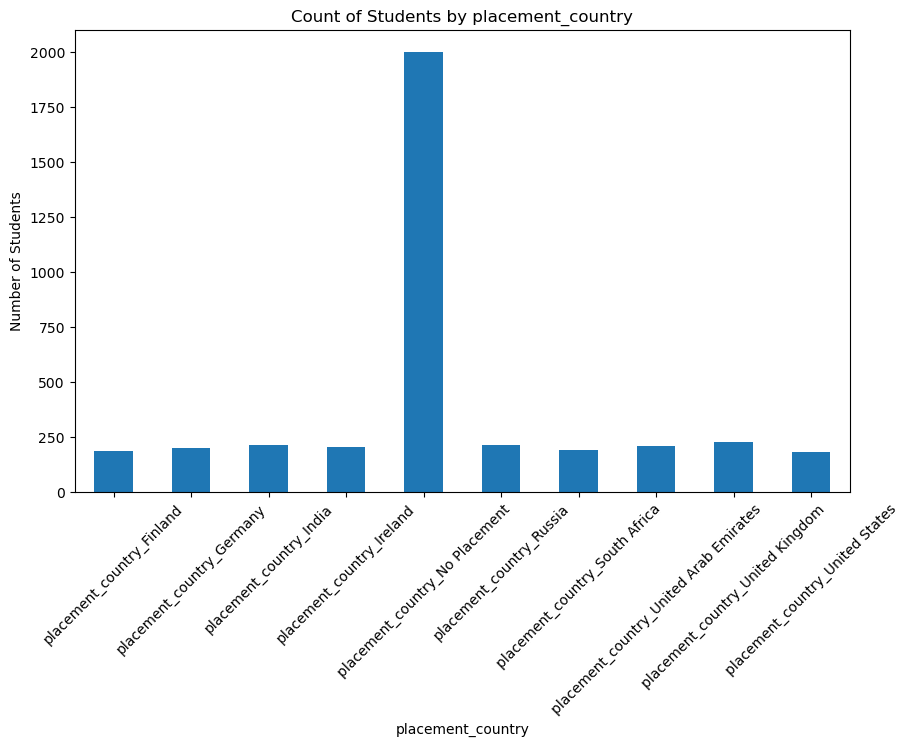

In [71]:
columns_filtered = data_encoded.filter(like='placement_country')

placement_country_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
placement_country_counts.plot(kind='bar')

plt.title("Count of Students by placement_country")
plt.xlabel("placement_country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [72]:
columns_filtered = data_encoded.filter(like='placement_company')
print(columns_filtered.head())

   placement_company_Apple  placement_company_Deloitte  \
0                        0                           0   
1                        0                           0   
4                        0                           0   
5                        0                           0   
6                        0                           0   

   placement_company_Facebook  placement_company_Goldman Sachs  \
0                           0                                0   
1                           0                                0   
4                           0                                0   
5                           0                                0   
6                           0                                0   

   placement_company_Google  placement_company_IBM  placement_company_Intel  \
0                         0                      0                        0   
1                         1                      0                        0   
4                

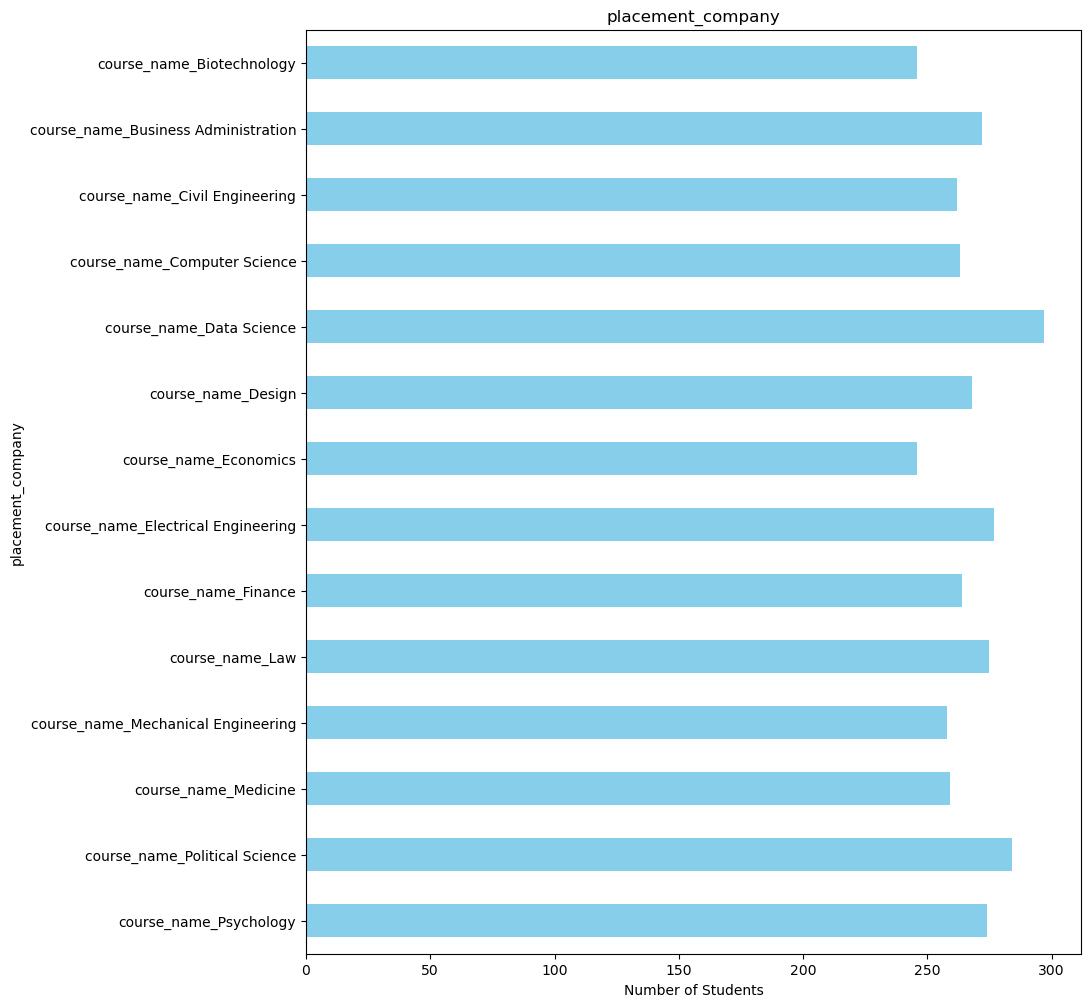

In [73]:
columns_filtered = data_encoded.filter(like='placement_company')

placement_company_counts = columns_filtered.sum()

plt.figure(figsize=(10,12))
course_name_counts.plot(kind='barh', color='skyblue')
plt.title("placement_company")
plt.xlabel("Number of Students")
plt.ylabel("placement_company")
plt.gca().invert_yaxis()  # largest on top
plt.show()

In [74]:
df['language_proficiency_test'].unique()

array(['TOEFL', 'PTE', 'Duolingo', 'IELTS'], dtype=object)

In [75]:
columns_filtered = data_encoded.filter(like='language_proficiency_test')
print(columns_filtered.head())

   language_proficiency_test_IELTS  language_proficiency_test_PTE  \
0                                0                              0   
1                                0                              1   
4                                0                              1   
5                                0                              0   
6                                0                              0   

   language_proficiency_test_TOEFL  
0                                1  
1                                0  
4                                0  
5                                1  
6                                0  


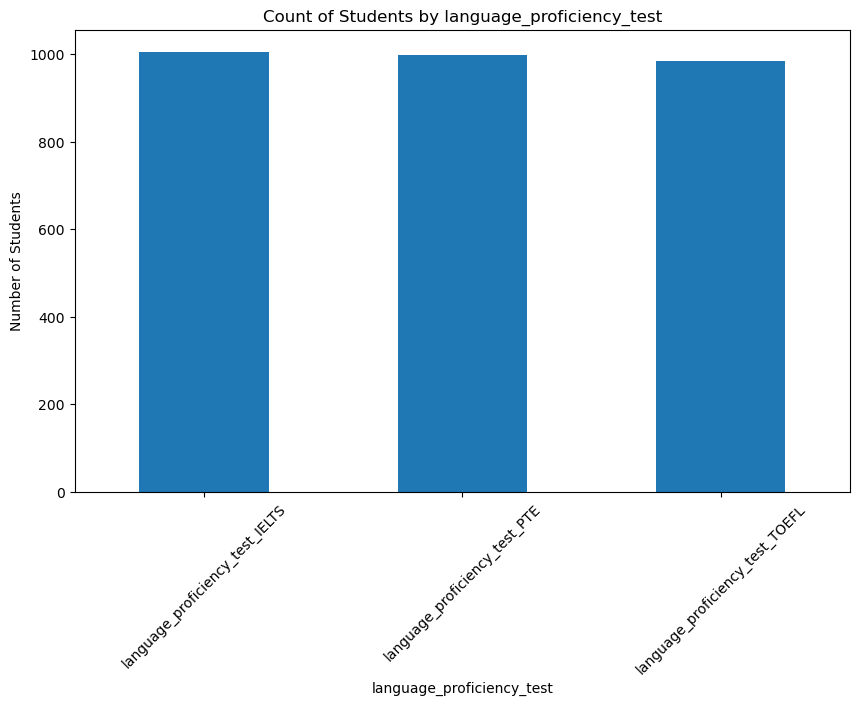

In [76]:
columns_filtered = data_encoded.filter(like='language_proficiency_test')

language_proficiency_test_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
language_proficiency_test_counts.plot(kind='bar')

plt.title("Count of Students by language_proficiency_test")
plt.xlabel("language_proficiency_test")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [77]:
columns_filtered = data_encoded.filter(like='visa_status')
print(columns_filtered.head())

   visa_status_J1  visa_status_Schengen Student Visa  \
0               0                                  0   
1               0                                  0   
4               0                                  1   
5               1                                  0   
6               0                                  0   

   visa_status_Student Visa  visa_status_Study Permit  visa_status_Tier 4  
0                         0                         0                   1  
1                         0                         1                   0  
4                         0                         0                   0  
5                         0                         0                   0  
6                         0                         1                   0  


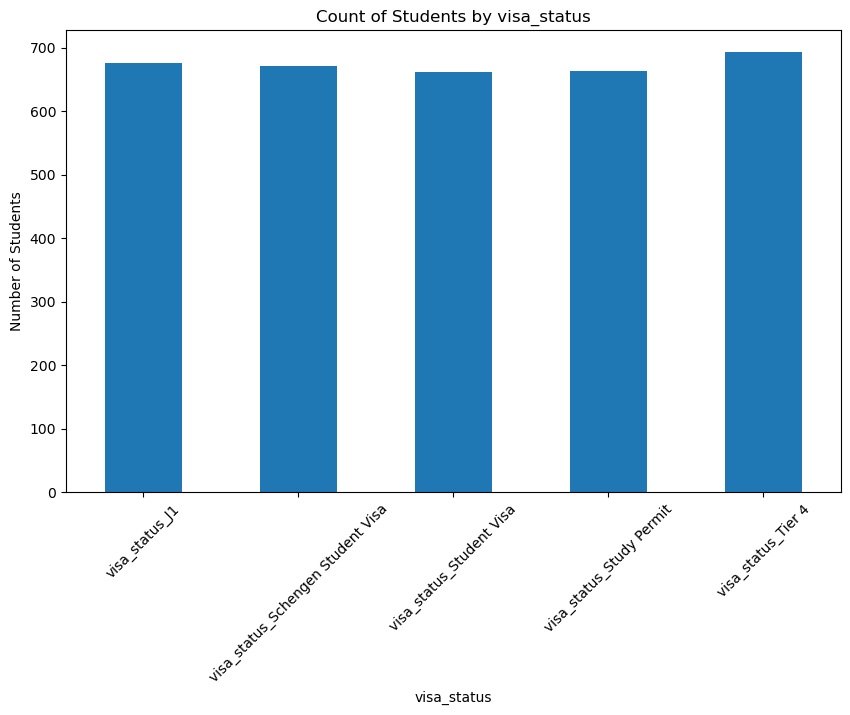

In [78]:
columns_filtered = data_encoded.filter(like='visa_status')

visa_status_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
visa_status_counts.plot(kind='bar')

plt.title("Count of Students by visa_status")
plt.xlabel("visa_status")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [79]:
columns_filtered = data_encoded.filter(like='post_graduation_visa')
print(columns_filtered.head())

   post_graduation_visa_OPT  post_graduation_visa_PSW  \
0                         0                         0   
1                         1                         0   
4                         1                         0   
5                         0                         0   
6                         0                         0   

   post_graduation_visa_Post-Study Visa  post_graduation_visa_Work Permit  
0                                     0                                 1  
1                                     0                                 0  
4                                     0                                 0  
5                                     0                                 0  
6                                     0                                 0  


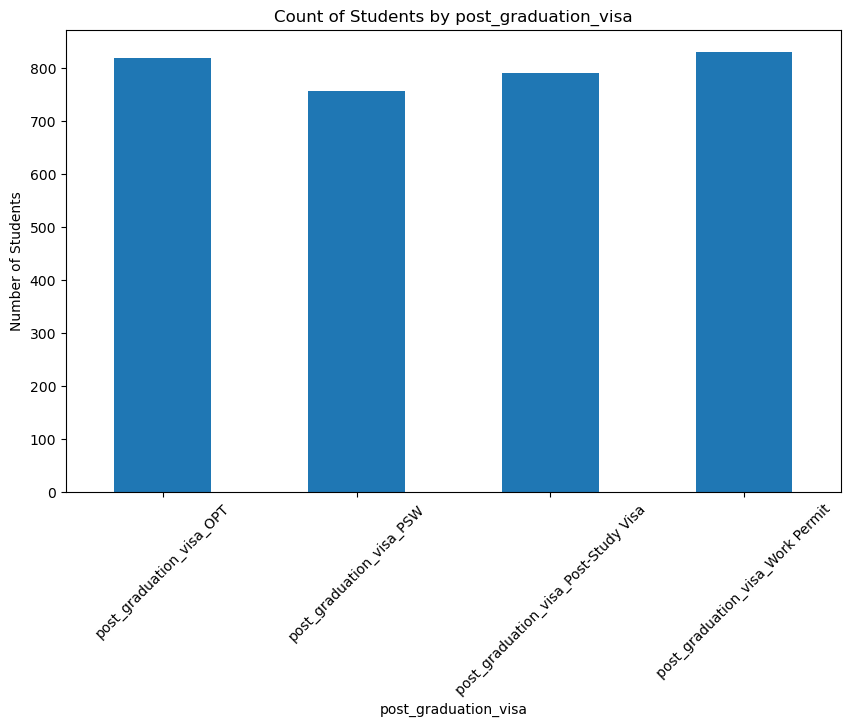

In [80]:
columns_filtered = data_encoded.filter(like='post_graduation_visa')

post_graduation_visa_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
post_graduation_visa_counts.plot(kind='bar')

plt.title("Count of Students by post_graduation_visa")
plt.xlabel("post_graduation_visa")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

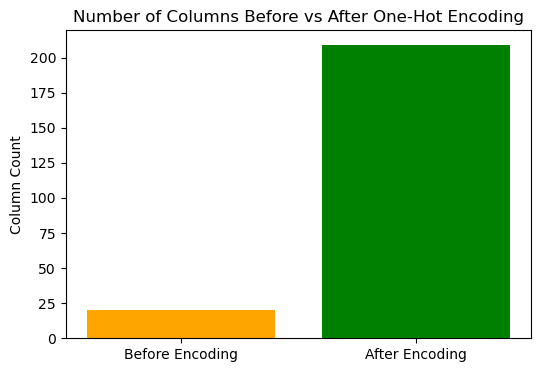

In [81]:
plt.figure(figsize=(6,4))
plt.bar(["Before Encoding", "After Encoding"], [df.shape[1],data_encoded.shape[1]], color=["orange", "green"])
plt.title("Number of Columns Before vs After One-Hot Encoding")
plt.ylabel("Column Count")
plt.show()

In [82]:
data_encoded.shape

(4018, 209)

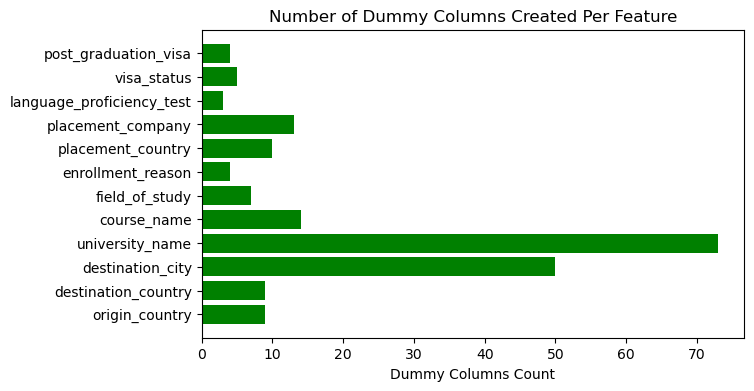

In [83]:
# Count how many dummies created per categorical feature
dummy_counts = {col:data_encoded.filter(like=col).shape[1] for col in ['origin_country','destination_country','destination_city','university_name','course_name','field_of_study','enrollment_reason','placement_country', 'placement_company', 'language_proficiency_test','visa_status','post_graduation_visa']}

plt.figure(figsize=(7,4))
plt.barh(list(dummy_counts.keys()), list(dummy_counts.values()), color="green")
plt.title("Number of Dummy Columns Created Per Feature")
plt.xlabel("Dummy Columns Count")
plt.show()

In [84]:
data_encoded.columns.tolist()

['student_id',
 'year_of_enrollment',
 'scholarship_received',
 'graduation_year',
 'placement_status',
 'starting_salary_usd',
 'gpa_or_score',
 'test_score',
 'origin_country_Finland',
 'origin_country_Germany',
 'origin_country_India',
 'origin_country_Ireland',
 'origin_country_Russia',
 'origin_country_South Africa',
 'origin_country_United Arab Emirates',
 'origin_country_United Kingdom',
 'origin_country_United States',
 'destination_country_Finland',
 'destination_country_Germany',
 'destination_country_India',
 'destination_country_Ireland',
 'destination_country_Russia',
 'destination_country_South Africa',
 'destination_country_United Arab Emirates',
 'destination_country_United Kingdom',
 'destination_country_United States',
 'destination_city_Abu Dhabi',
 'destination_city_Bangalore',
 'destination_city_Berlin',
 'destination_city_Birmingham',
 'destination_city_Boston',
 'destination_city_Cambridge',
 'destination_city_Cape Town',
 'destination_city_Chennai',
 'destinatio

In [85]:
data_encoded.dtypes

student_id                              object
year_of_enrollment                       int64
scholarship_received                     int64
graduation_year                          int64
placement_status                         int64
                                         ...  
visa_status_Tier 4                       int64
post_graduation_visa_OPT                 int64
post_graduation_visa_PSW                 int64
post_graduation_visa_Post-Study Visa     int64
post_graduation_visa_Work Permit         int64
Length: 209, dtype: object

Featur Engineering

In [86]:
data_encoded['study_duration'] = data_encoded['graduation_year'] - data_encoded['year_of_enrollment']

In [87]:
data_encoded['study_duration'].head()

0    3
1    1
4    1
5    1
6    2
Name: study_duration, dtype: int64

In [88]:
data_encoded.shape

(4018, 210)

In [89]:
data = data_encoded.drop(columns=['year_of_enrollment', 'graduation_year'])

In [90]:
data.shape

(4018, 208)

In [91]:
standard_cols = ['test_score', 'gpa_or_score']   

In [92]:
print("Before scaling:")
print(data[standard_cols ].head())

Before scaling:
   test_score  gpa_or_score
0         7.8          3.92
1         7.9          2.60
4         8.2          2.96
5         7.4          2.69
6         5.6          2.99


In [93]:
scaler_standard = StandardScaler()
data[standard_cols] = scaler_standard.fit_transform(data[standard_cols])

In [94]:
print("\n After scaling:")
print(data[standard_cols ].head())


 After scaling:
   test_score  gpa_or_score
0    0.679688      1.556464
1    0.765584     -1.488781
4    1.023273     -0.658260
5    0.336103     -1.281151
6   -1.210030     -0.589050


In [95]:
minmax_cols   = ['study_duration','starting_salary_usd']

In [96]:
print("Before scaling:")
before_scale=(data[minmax_cols ])
print(before_scale.head())

Before scaling:
   study_duration  starting_salary_usd
0               3                36416
1               1                32956
4               1                54790
5               1                    0
6               2                    0


In [97]:
scaler_minmax = MinMaxScaler()

In [98]:
data[minmax_cols] = scaler_minmax.fit_transform(data[minmax_cols])

In [99]:
print("After scaling:")
after_scale=data[minmax_cols ]
print(after_scale.head())

After scaling:
   study_duration  starting_salary_usd
0             1.0             0.242883
1             0.0             0.219806
4             0.0             0.365432
5             0.0             0.000000
6             0.5             0.000000


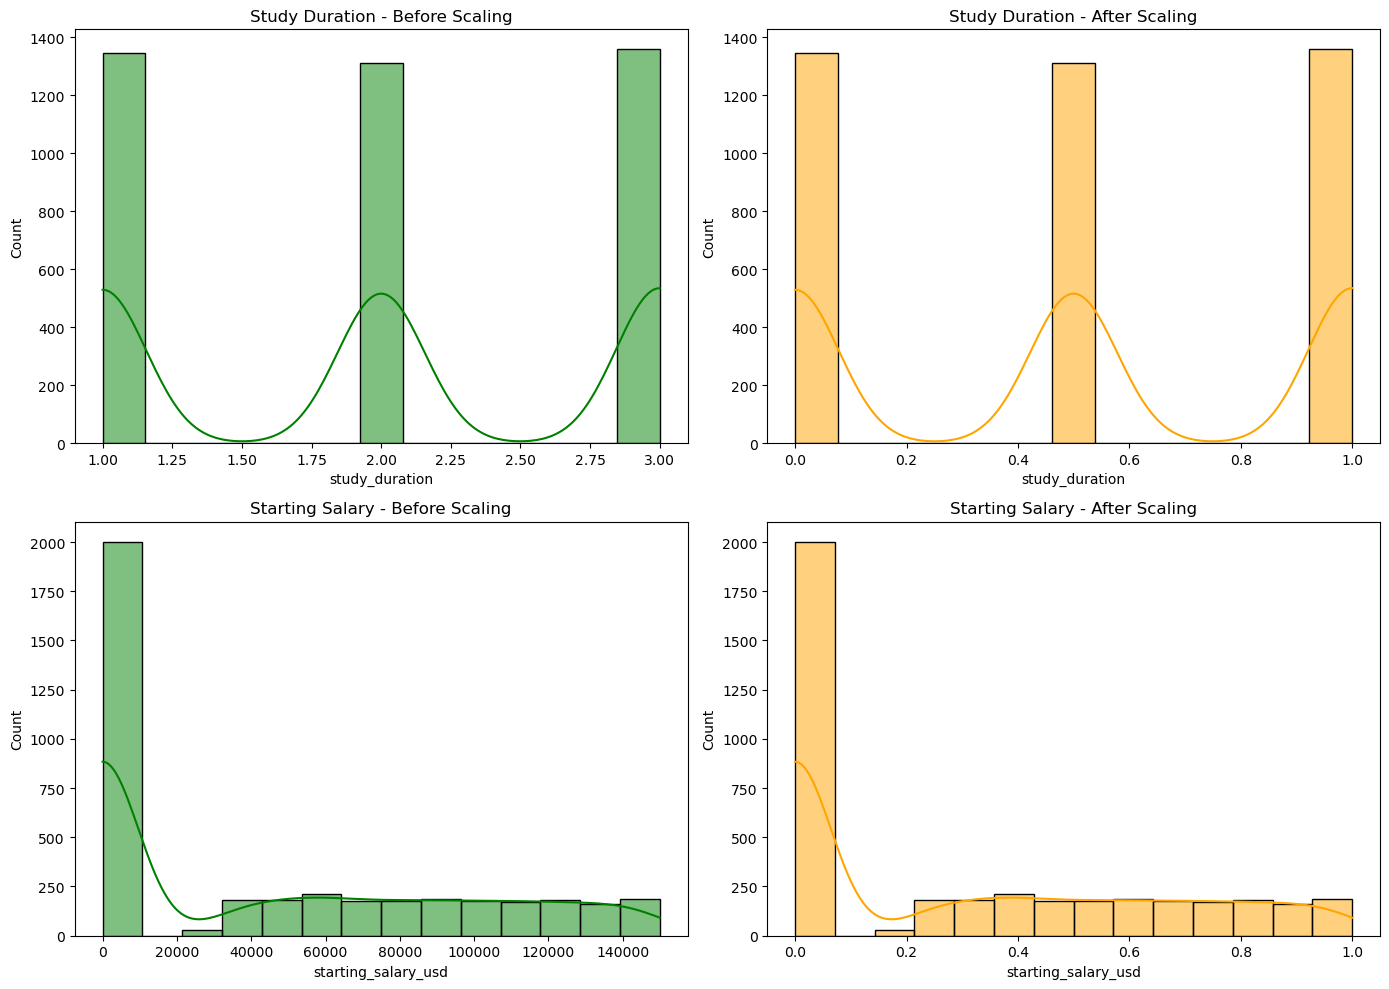

In [100]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Study Duration
sns.histplot(before_scale['study_duration'], kde=True, ax=axes[0,0], color="green")
axes[0,0].set_title("Study Duration - Before Scaling")

sns.histplot(after_scale['study_duration'], kde=True, ax=axes[0,1], color="orange")
axes[0,1].set_title("Study Duration - After Scaling")

# Starting Salary
sns.histplot(before_scale['starting_salary_usd'], kde=True, ax=axes[1,0], color="green")
axes[1,0].set_title("Starting Salary - Before Scaling")

sns.histplot(after_scale['starting_salary_usd'], kde=True, ax=axes[1,1], color="orange")
axes[1,1].set_title("Starting Salary - After Scaling")

plt.tight_layout()
plt.show()


Feature Engineering Part 02

In [101]:
data= data.drop(columns=['student_id'])

count    4018.000000
mean        0.298616
std         0.339608
min         0.000000
25%         0.000000
50%         0.204549
75%         0.591583
max         1.000000
Name: starting_salary_usd, dtype: float64


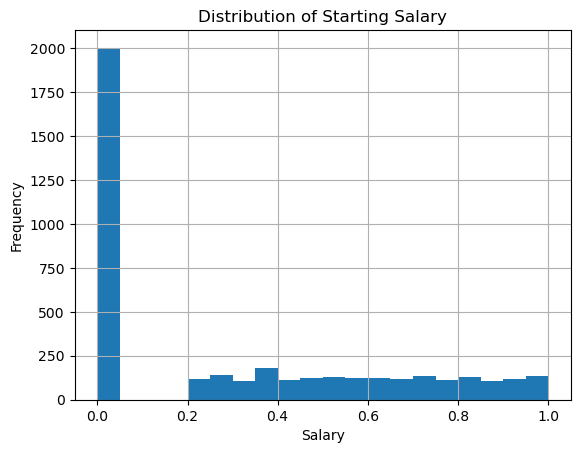

In [102]:
print(data['starting_salary_usd'].describe())
# Visualize distribution
data['starting_salary_usd'].hist(bins=20)
plt.title('Distribution of Starting Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


In [103]:
data['starting_salary_usd']


0       0.242883
1       0.219806
4       0.365432
5       0.000000
6       0.000000
          ...   
4995    0.657418
4996    0.217719
4997    0.672151
4998    0.000000
4999    0.482005
Name: starting_salary_usd, Length: 4018, dtype: float64

In [104]:
# Define bins for normalized data (0 to 1)
bins = [0, 0.333, 0.667, 1.0]
labels = ['Low', 'Medium', 'High']


data['Salary_Bin'] = pd.cut(data['starting_salary_usd'], bins=bins, labels=labels, include_lowest=True)

# Check bin distribution
print(data['Salary_Bin'].value_counts())

Salary_Bin
Low       2326
Medium     874
High       818
Name: count, dtype: int64


In [105]:
# after creating salary bin feature . we do not drop starting salary usd feature because when we evaluvate decision tree model,Random Forest model that they can handle continuous variable and The continuous "starting salary" has  exact salary values

In [106]:
data['Salary_Bin'].unique()

['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']

In [107]:
# salary Bin has categoriacl data . Therfore it should be label encoded. 

In [108]:
data['Salary_Bin'] = label.fit_transform(data['Salary_Bin'])

In [109]:
data['Salary_Bin'].unique()

array([1, 2, 0])

In [110]:
print("Number of features before used Variance Treshold:")
data.shape

Number of features before used Variance Treshold:


(4018, 208)

In [111]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  
reduced_data = selector.fit_transform(data.drop('placement_status', axis=1))


In [112]:
print("Number of features after used Variance Treshold:")
data.shape

Number of features after used Variance Treshold:


(4018, 208)

In [113]:
#Variance Treshold is used to find constant features . But in this data set doesn't have constant features or low variance features to drop .

In [114]:
corr_matrix = data.corr(numeric_only=True)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
data_filtered = data.drop(to_drop, axis=1)
print("Dropped due to correlation:", len(to_drop))


Dropped due to correlation: 36


In [115]:
print("Columns dropped due to high correlation:")
print(to_drop)


Columns dropped due to high correlation:
['university_name_American University of Sharjah', 'university_name_BITS Pilani', 'university_name_Heidelberg University', 'university_name_IISc Bangalore', 'university_name_IIT Bombay', 'university_name_IIT Madras', 'university_name_Kazan Federal University', 'university_name_LUT University', 'university_name_Maynooth University', 'university_name_McGill University', 'university_name_NIT Trichy', 'university_name_National University of Ireland Galway', 'university_name_Novosibirsk State University', "university_name_Queen's University", 'university_name_Rhodes University', 'university_name_Saint Petersburg State University', 'university_name_Stellenbosch University', 'university_name_Tampere University', 'university_name_UCLA', 'university_name_University College Cork', 'university_name_University of Alberta', 'university_name_University of Birmingham', 'university_name_University of Cambridge', 'university_name_University of Cape Town', 'unive

In [116]:
data_filtered.shape

(4018, 172)

In [117]:
from sklearn.decomposition import PCA

In [118]:

pca = PCA(n_components=0.95)  
# n_components=0.95 keeps 95% of variance


data_pca = pca.fit_transform(data_filtered)

#Check how many components were kept
print("Original shape:", data_filtered.shape)
print("Reduced shape:", data_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance retained:", pca.explained_variance_ratio_.sum())

#Put back into DataFrame
data_pca_df = pd.DataFrame(data_pca, columns=[f"PC{i+1}" for i in range(data_pca.shape[1])])

print(data_pca_df.head())


Original shape: (4018, 172)
Reduced shape: (4018, 99)
Explained variance ratio: [0.08787668 0.08559639 0.05477199 0.03750655 0.02228277 0.02190215
 0.02126463 0.01854231 0.01804813 0.01785926 0.01733674 0.01714296
 0.01692042 0.01679471 0.01599944 0.01568293 0.0151719  0.01495181
 0.01471739 0.01463521 0.01422301 0.01402305 0.01383512 0.01342897
 0.01312029 0.01264382 0.01106444 0.0109796  0.01088533 0.01076869
 0.0107062  0.01039537 0.00891269 0.00880237 0.00867204 0.00839446
 0.00822385 0.00815137 0.00769912 0.0074919  0.00635949 0.00606119
 0.0059535  0.00593198 0.0058608  0.00579202 0.00575052 0.00565816
 0.00563561 0.00559812 0.00554968 0.00537005 0.00531504 0.00522556
 0.00490108 0.0040069  0.00375734 0.00369476 0.00360304 0.00353316
 0.00348634 0.00339655 0.00334865 0.00325482 0.00322839 0.00319696
 0.00318558 0.00313851 0.00312905 0.00309926 0.00307956 0.00296544
 0.00295704 0.00284492 0.00280983 0.00278436 0.00262491 0.00257092
 0.00238131 0.0022755  0.00213531 0.00181535 0.00

In [119]:
data_pca_df.columns.tolist()

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89',
 'PC90',
 'PC91',
 'PC92',
 'PC93',
 'PC94',
 'PC95',
 'PC96',
 'PC97',
 'PC98',
 'PC99']

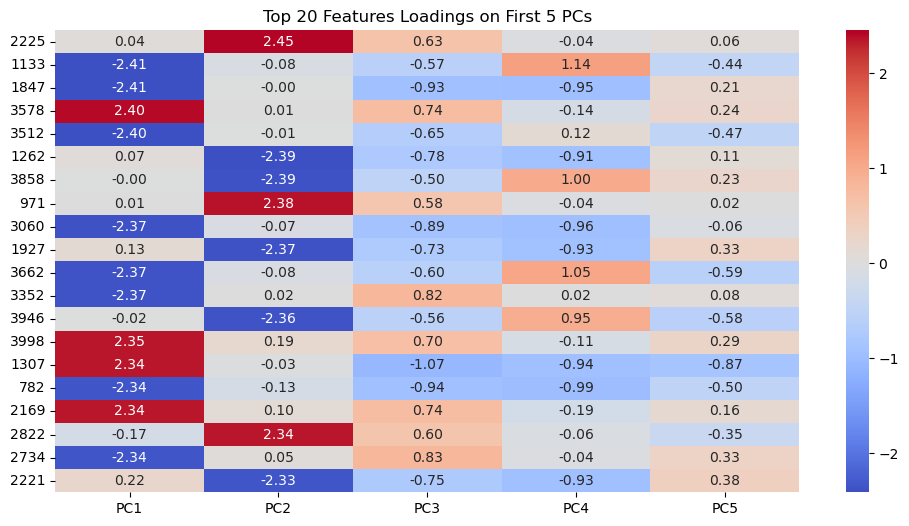

In [120]:
# Top N absolute loadings across first 5 PCs
N = 20
abs_loadings = data_pca_df.iloc[:, :5].abs().max(axis=1)   # max loading per feature across PCs
top_features = abs_loadings.nlargest(N).index

plt.figure(figsize=(12,6))
sns.heatmap(data_pca_df.loc[top_features, data_pca_df.columns[:5]],
            center=0, cmap="coolwarm", annot=True, fmt=".2f")
plt.title(f"Top {N} Features Loadings on First 5 PCs")
plt.show()



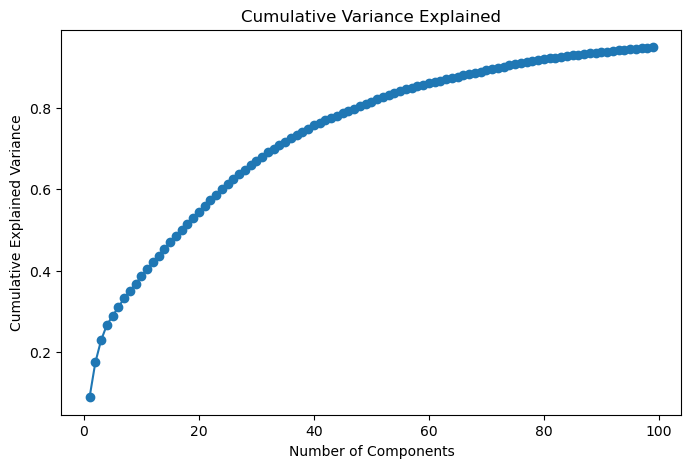

In [121]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained")
plt.show()
